In [34]:
! pip install sklearn

In [23]:
! pip install pactools

     |████████████████████████████████| 82 kB 2.2 MB/s eta 0:00:011
     |████████████████████████████████| 6.9 MB 6.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 7.4 MB/s eta 0:00:01


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer, confusion_matrix, fbeta_score, classification_report
from pactools import Comodulogram, REFERENCES
from pactools import simulate_pac
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
X_train = pd.read_csv('X_train_Kickstarter.csv')
X_test = pd.read_csv('X_test_Kickstarter.csv')
y_train = pd.read_csv('y_train_Kickstarter.csv')
y_test = pd.read_csv('y_test_Kickstarter.csv')

In [14]:
y_train = y_train.state
y_test = y_test.state

In [4]:
dummy_clf = DummyClassifier(strategy = 'most_frequent')

In [5]:
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [6]:
y_pred = dummy_clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     22545
           1       0.61      1.00      0.76     35190

    accuracy                           0.61     57735
   macro avg       0.30      0.50      0.38     57735
weighted avg       0.37      0.61      0.46     57735



/Users/johannes/neuefische/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/johannes/neuefische/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/johannes/neuefische/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

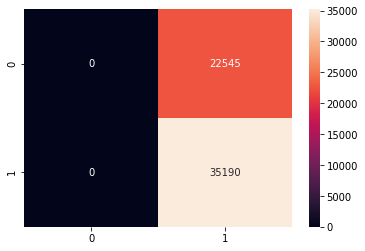

In [7]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cnf_matrix, annot = True, fmt = "g")


## adaboost

In [8]:
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import make_scorer, confusion_matrix, fbeta_score, classification_report 
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier,StackingClassifier

In [11]:
ada_clf = AdaBoostClassifier()

In [15]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier()

In [16]:
y_pred = ada_clf.predict(X_test)

In [17]:
confusion_matrix(y_test,y_pred)

array([[13704,  8841],
       [ 6204, 28986]])

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.61      0.65     22545
           1       0.77      0.82      0.79     35190

    accuracy                           0.74     57735
   macro avg       0.73      0.72      0.72     57735
weighted avg       0.74      0.74      0.74     57735



In [39]:
param_grid_ada= {'n_estimators':[876],
                'learning_rate':[0.6],
               'random_state':[105]}

In [40]:

from pactools import simulate_pac
from pactools.grid_search import ExtractDriver, AddDriverDelay
from pactools.grid_search import DARSklearn, MultipleArray
from pactools.grid_search import GridSearchCVProgressBar

In [41]:
# Plug the model and the parameter grid into a GridSearchCV estimator
# (GridSearchCVProgressBar is identical to GridSearchCV, but it adds a nice
# progress bar to monitor progress.)
grid_ada = GridSearchCVProgressBar(ada_clf, param_grid_ada, scoring='accuracy' ,return_train_score=False,n_jobs=5)
grid_ada.fit(X_train, y_train)
print(grid_ada.best_params_)

{'learning_rate': 0.6, 'n_estimators': 876, 'random_state': 105}


In [42]:
y_pred=grid_ada.predict(X_test)

/Users/johannes/neuefische/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
cnf_matrix_ada = confusion_matrix(y_test,y_pred)

/Users/johannes/neuefische/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

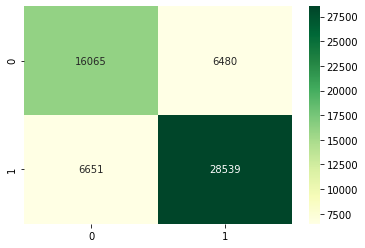

In [51]:
sns.heatmap(cnf_matrix_ada, annot = True, fmt = "g", cmap='YlGn')

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71     22545
           1       0.81      0.81      0.81     35190

    accuracy                           0.77     57735
   macro avg       0.76      0.76      0.76     57735
weighted avg       0.77      0.77      0.77     57735



/Users/johannes/neuefische/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
fbeta_score(y_test,y_pred,0.5)

/Users/johannes/neuefische/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=0.5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.8141624730409778

In [56]:
from joblib import dump, load

In [58]:
dump(grid_ada.best_estimator_,"adaboost.pickle")

['adaboost.pickle']

In [59]:
lada = load("adaboost.pickle")

In [60]:
lada.predict(X_test)

array([1, 0, 1, ..., 1, 0, 1])